# Series de tiempo estacionarias
Tomando como referencia el segundo capítulo de la cuarta edición del libro de Enders, *Applied Econometric Time Series*, se presentan ejemplos prácticos para ilustrar la lógica detrás de la metodología Box-Jenkins. Se utilizarán datos simulados y reales.

## Librerías
* **Numpy**: Manejo de varias funciones y estructuras matemáticas
* **Matplotlib**: Gráficas.
* **Pandas**: Manejo de *dataframes*.
* **Statsmodels**: Modelos ARIMA.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Estimación de un modelo $\text{AR(1)}$
Se utilizarán datos simulados. Se generarán $100$ observaciones aleatorias y se utilizará el siguiente modelo autorregresivo de primer orden:

$$y_t = 0.7y_{t-1} + \varepsilon_t$$

Este ejemplo no llega a seguir completamente la metodología Box-Jenkins, pero ayuda a entender la lógica detrás del análisis de los modelos $\text{ARMA}$. 

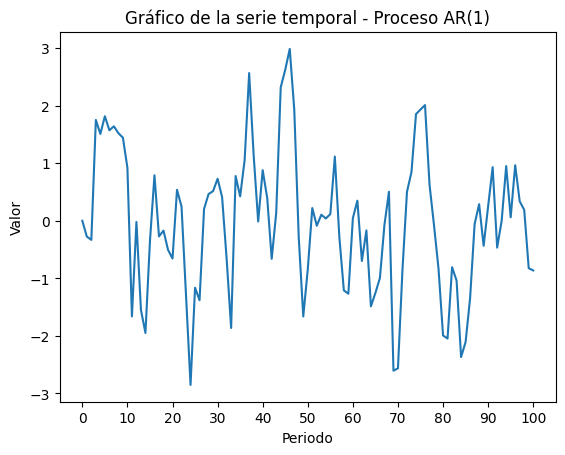

In [69]:
# Generación de valores aleatorios
np.random.seed(2022) # Semilla para que el experimento sea reproducible
wn = np.random.normal(loc=0, scale=1, size = 101)
y = [0]
for i in range(1,101):
    y.append(0.7*y[i-1] + wn[i])

# Gráfico de la serie temporal
plt.plot(y)
plt.title("Gráfico de la serie temporal - Proceso AR(1)")
plt.xticks(range(0,101,10))
plt.xlabel("Periodo")
plt.ylabel("Valor")
plt.show()

### Paso 1 - Comparación de ACF y PACF para elegir el modelo ARMA

A continuación, se analizará el correlograma de la serie temporal para proponer posibles modelos que se ajusten a los datos.

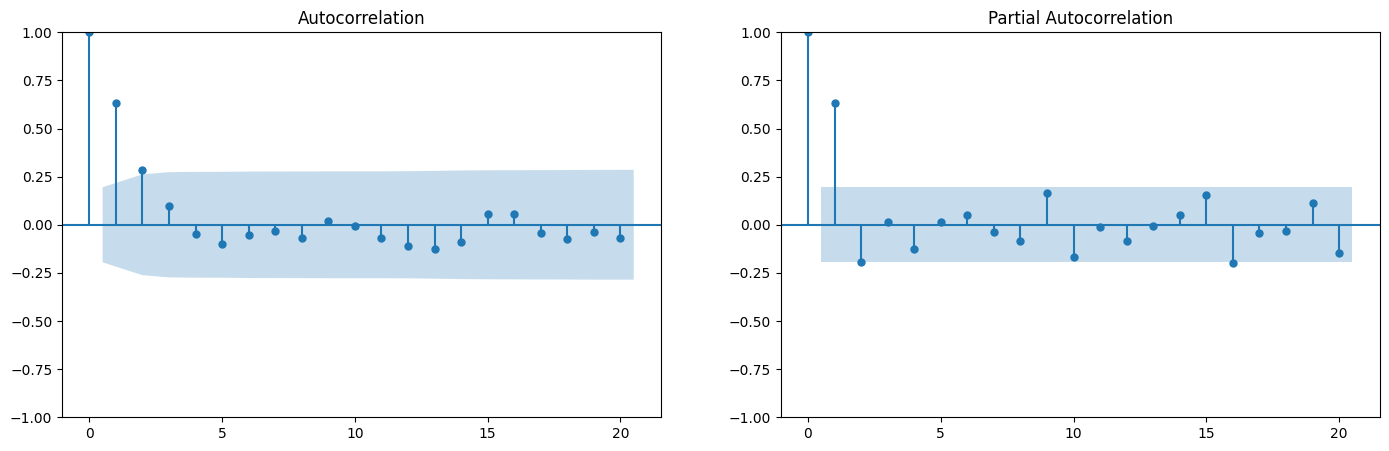

In [70]:
fig, ax = plt.subplots(1,2, figsize = (17,5))
sm.tsa.graphics.plot_acf(y, lags=20, ax = ax[0])
sm.tsa.graphics.plot_pacf(y, lags=20, method= "ywmle", ax = ax[1])
plt.show()

A pesar de saber que el proceso generador de datos es un $\text{AR}(1)$, los correlogramas apuntan a diferentes modelos. Observando la autocorrelación parcial, por el corte después del primer período podríamos considerar un proceso $\text{AR}(1)$. La autocorrelación también da indicios de que este podría ser el modelo correcto, especialmente por el decaimiento exponencial. Sin embargo, es también posible considerar un modelo $\text{AR}(2)$ debido a que la autocorrelación parcial del segundo rezago, aunque apenas, sigue siendo significativo. En el libro, se observa un pico en el rezago 12 en la autocorrelación, por lo que consideran como modelo un término de media movil con rezago $12$.
Finalmente, para findes demostrativos, se realizará la estimación de un modelo $\text{ARMA}(1,1)$.

Así, se tienen como candidatos los siguientes modelos:
$$\begin{align*}
\text{Modelo 1:} \ \ & y_t = a_1y_{t-1}+\varepsilon_t\\
\text{Modelo 2:} \ \ & y_t = a_1y_{t-1}+a_2y_{t-1}+\varepsilon_t\\
\text{Modelo 3:} \ \ & y_t = a_1y_{t-1}+\varepsilon_t+\beta_{12}\varepsilon_{t-12}\\
\text{Modelo 4:} \ \ & y_t = a_1y_{t-1}+a_2y_{t-1}+\varepsilon_t+\beta_{1}\varepsilon_{t-1}
\end{align*}$$

### Paso 2 - Estimación de los modelos tentativos
Ahora, se realiza la estimación de los modelos que se han tenido en cuenta en el paso anterior.

In [71]:
model_1 = sm.tsa.arima.ARIMA(y, order=(1,0,0), trend = 'n')
res_1 = model_1.fit()

model_2 = sm.tsa.arima.ARIMA(y, order=(2,0,0), trend = 'n')
res_2 = model_2.fit()

model_3 = sm.tsa.arima.ARIMA(y, order=(1,0,[0]*11 + [1]), trend = 'n')
res_3 = model_3.fit()

model_4 = sm.tsa.arima.ARIMA(y, order=(1,0,1), trend = 'n')
res_4 = model_4.fit()

### Paso 3 - Análisis y elección de modelos
Finalmente, para la selección de modelos, podemos enfocarnos en la suma de residuales, el critero bayesiano de información y el indicador de Akaike de cada modelo. También podemos hacer uso de los estadísticos Ljung-Box para analizar el comportamiento de los residuales. Como nota, es importante mencionar que esta no es la metodología de Box-Jenkins propiamente dicha, pues esta implica la identificación del orden de integración y también el análisis posterior de los residuos (en concreto, probar si los residuos se comportan como un ruído blanco).

In [72]:
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -138.115
Date:                Sat, 22 Apr 2023   AIC                            280.230
Time:                        11:59:34   BIC                            285.461
Sample:                             0   HQIC                           282.348
                                - 101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6307      0.082      7.659      0.000       0.469       0.792
sigma2         0.8977      0.122      7.348      0.000       0.658       1.137
===================================================================================
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):                 1.53
Prob(Q):                              0.19   Prob(JB):                         0.46
Heteroskedasticity (H):               0.96   Skew:                            -0.29
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -136.201
Date:                Sat, 22 Apr 2023   AIC                            278.401
Time:                        11:59:35   BIC                            286.247
Sample:                             0   HQIC                           281.577
                                - 101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7530      0.102      7.376      0.000       0.553       0.953
ar.L2         -0.1916      0.104     -1.837      0.066      -0.396       0.013
sigma2         0.8636      0.115      7.538      0.000       0.639       1.088
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.93   Prob(JB):                         0.48
Heteroskedasticity (H):               0.89   Skew:                            -0.26
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  101
Model:              ARIMA(1, 0, [12])   Log Likelihood                -137.971
Date:                Sat, 22 Apr 2023   AIC                            281.942
Time:                        11:59:35   BIC                            289.787
Sample:                             0   HQIC                           285.118
                                - 101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6266      0.082      7.636      0.000       0.466       0.787
ma.L12        -0.0627      0.093     -0.674      0.500      -0.245       0.120
sigma2         0.8948      0.121      7.378      0.000       0.657       1.132
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.21   Prob(JB):                         0.46
Heteroskedasticity (H):               0.95   Skew:                            -0.29
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
res_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -136.113
Date:                Sat, 22 Apr 2023   AIC                            278.226
Time:                        11:59:35   BIC                            286.072
Sample:                             0   HQIC                           281.403
                                - 101                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4500      0.139      3.232      0.001       0.177       0.723
ma.L1          0.3135      0.141      2.231      0.026       0.038       0.589
sigma2         0.8620      0.115      7.483      0.000       0.636       1.088
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.95   Prob(JB):                         0.48
Heteroskedasticity (H):               0.87   Skew:                            -0.27
Prob(H) (two-sided):                  0.68   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
mod_sum = lambda x: [round(x.sse,2), round(x.bic,2), round(x.aic,2)]
# Indicadores de criterios de selección de modelos
pd.DataFrame({"Model 1": mod_sum(res_1),
"Model 2": mod_sum(res_2),
"Model 3": mod_sum(res_3),
"Model 4": mod_sum(res_4)},
index = ["SSE","BIC","AIC"])

,Model 1,Model 2,Model 3,Model 4
SSE,90.67,87.23,90.41,87.07
BIC,285.46,286.25,289.79,286.07
AIC,280.23,278.40,281.94,278.23


De esta manera, si uno no supiera cuál es el verdadero modelo, este ejemplo arrojaría como conclusión la utilización de un modelo $\text{ARMA}(1,1)$.